In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv', delimiter=',')

In [3]:
print(raw_df.head())

                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

In [4]:
print(raw_df.shape)

(12032, 12)


In [5]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB
None


In [6]:
print(raw_df.describe())

        Price for 2
count  12032.000000
mean     397.611370
std      332.045938
min       40.000000
25%      200.000000
50%      300.000000
75%      450.000000
max     5000.000000


In [7]:
wrong_data = raw_df['Delivery Rating'] == 'Delivery Rating'
print(raw_df[wrong_data])

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []


In [8]:
raw_df = raw_df[~wrong_data]

In [9]:
raw_df.drop(['Zomato URL', 'Delivery Rating', 'Address'], axis = 1, inplace=True)

In [10]:
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

  Dining Rating Dining Rating Count Delivery Rating Count  \
0           4.3                1500                  9306   
1           4.4                3059                 39200   
2           4.3                1361                 10500   
3           4.0                1101                 11200   
4           4.2                 617                 22400   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [11]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating Count    0
Features                 0
dtype: int64

In [12]:
raw_df[raw_df['Cuisine'].isnull()]

Empty DataFrame
Columns: [Name of Restaurant, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating Count, Features]
Index: []

In [13]:
raw_df = raw_df.drop(labels=12031, axis=0)

In [14]:
raw_df.fillna('NA', inplace=True)

In [15]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating Count    0
Features                 0
dtype: int64

In [16]:
raw_df['Delivery Rating Count'].value_counts()

Not enough Delivery Reviews    3379
Does not offer Delivery        2252
None                            219
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: Delivery Rating Count, Length: 2282, dtype: int64

In [17]:
raw_df['Dining Rating'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

In [18]:
raw_df['Features'].value_counts()

['Home Delivery', 'Indoor Seating']                                                                                                                                                                                               2447
['Delivery Only']                                                                                                                                                                                                                  961
['Home Delivery']                                                                                                                                                                                                                  759
['Indoor Seating']                                                                                                                                                                                                                 569
['Breakfast', 'Home Delivery', 'Indoor Seating']                            

In [19]:
raw_df['Features'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

In [20]:
raw_df['Cuisine'] = raw_df['Cuisine'].astype('object')
raw_df['Price for 2'] = raw_df['Price for 2'].astype('float64')
raw_df['Features'] = raw_df['Features'].astype('object')

In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12031 entries, 0 to 12030
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12031 non-null  object 
 1   Location               12031 non-null  object 
 2   Cuisine                12031 non-null  object 
 3   Top Dishes             12031 non-null  object 
 4   Price for 2            12031 non-null  float64
 5   Dining Rating          12031 non-null  object 
 6   Dining Rating Count    12031 non-null  object 
 7   Delivery Rating Count  12031 non-null  object 
 8   Features               12031 non-null  object 
dtypes: float64(1), object(8)
memory usage: 939.9+ KB


In [22]:
raw_df['Features'].value_counts()

['Home Delivery', 'Indoor Seating']                                                                                                                                                                                               2447
['Delivery Only']                                                                                                                                                                                                                  961
['Home Delivery']                                                                                                                                                                                                                  759
['Indoor Seating']                                                                                                                                                                                                                 569
['Breakfast', 'Home Delivery', 'Indoor Seating']                            

In [23]:
temp_df = raw_df['Features'].str.split("(", n = 1, expand = True)
temp_df

0
0                    ['Home Delivery', 'Indoor Seating']
1      ['Home Delivery', 'Free Parking', 'Table booki...
2                    ['Home Delivery', 'Indoor Seating']
3      ['Home Delivery', 'Free Parking', 'Card Upon D...
4                    ['Home Delivery', 'Indoor Seating']
...                                                  ...
12026                     ['Breakfast', 'Delivery Only']
12027                     ['Breakfast', 'Delivery Only']
12028                     ['Breakfast', 'Delivery Only']
12029                     ['Breakfast', 'Delivery Only']
12030                     ['Breakfast', 'Delivery Only']

[12031 rows x 1 columns]

In [24]:
raw_df['Home Delivery'] = temp_df[0]
raw_df['Delivery Only'] = temp_df[0]
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

  Dining Rating Dining Rating Count Delivery Rating Count  \
0           4.3                1500                  9306   
1           4.4                3059                 39200   
2           4.3                1361                 10500   
3           4.0                1101                 11200   
4           4.2                 617                 22400   

                                            Features  \
0                ['Home Delivery', 'Indoor Seating']   
1  ['Home Delivery', 'Free Parking', 'Table booki...   
2                ['Home Delivery', 'Indoor Seating']   
3  ['Home Delivery', 'Free Parking', 'Card Upon D...   
4                ['Home Delivery', 'Indoor Seating']   

                                       Home Delivery  \
0                ['Home Delivery', 'Indoor Seating']   
1  ['Home Delivery', 'Free Parking', 'Table booki...   
2                ['Home Delivery', 'Indoor Seating']   
3  ['Home Delivery', 'Free Parking', 'Card Upon D...   
4                ['Home Delivery', 'Indoor Seating']   

                                       Delivery Only  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [25]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating Count    0
Features                 0
Home Delivery            0
Delivery Only            0
dtype: int64

In [26]:
raw_df.fillna('NA', inplace=True)

In [27]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12031 entries, 0 to 12030
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12031 non-null  object 
 1   Location               12031 non-null  object 
 2   Cuisine                12031 non-null  object 
 3   Top Dishes             12031 non-null  object 
 4   Price for 2            12031 non-null  float64
 5   Dining Rating          12031 non-null  object 
 6   Dining Rating Count    12031 non-null  object 
 7   Delivery Rating Count  12031 non-null  object 
 8   Features               12031 non-null  object 
 9   Home Delivery          12031 non-null  object 
 10  Delivery Only          12031 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [28]:
useless_data = (raw_df['Dining Rating Count'] == 0.0) | (raw_df['Features'] == 0)
raw_df[useless_data]

Empty DataFrame
Columns: [Name of Restaurant, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating Count, Features, Home Delivery, Delivery Only]
Index: []

In [29]:
raw_df = raw_df[~useless_data]

In [30]:
raw_df['Dining Rating Count'].value_counts()

Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: Dining Rating Count, Length: 794, dtype: int64

In [31]:
raw_df['Dining Rating Count'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
raw_df['Dining Rating Count'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good',inplace=True)
raw_df['Dining Rating Count'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good',inplace=True)
raw_df['Dining Rating Count'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['Dining Rating Count'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['Dining Rating Count'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor',inplace=True) 
                              

In [32]:
raw_df['Dining Rating Count'].value_counts()

Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: Dining Rating Count, Length: 794, dtype: int64

In [33]:
raw_df['Location'].value_counts()

Porur                                  418
Velachery                              372
Ambattur                               334
T. Nagar                               315
Perungudi                              288
                                      ... 
Keys Hotel, Thiruvanmiyur                1
Jade Resorts, East Coast Road (ECR)      1
Novotel Chennai, OMR                     1
Hotel Blue Diamond, Kilpauk              1
Chandra Metro Mall, Virugambakkam        1
Name: Location, Length: 268, dtype: int64

In [34]:
raw_df['Location'] = raw_df['Location'].str.replace('[a-zA-Z].+-- ','',regex=True)

In [35]:
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)

In [36]:
raw_df['Location'].value_counts()

Anna Nagar                           524
Porur                                418
Velachery                            372
Ambattur                             334
T. Nagar                             315
                                    ... 
Keys Hotel, Thiruvanmiyur              1
Jade Resorts, Coast Road (ECR)         1
Novotel Chennai, OMR                   1
Hotel Blue Diamond, Kilpauk            1
Chandra Metro Mall, Virugambakkam      1
Name: Location, Length: 267, dtype: int64

In [37]:
raw_df['Location'] = raw_df['Location'].str.replace('336 & 338, Main Road, Pallavaram, Chennai', 'Pallavaram', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('New 14, Old 11/3Q, Railway Station Road, MKN Road, Near Antony Church, Alandur, Chennai', 'Alandur', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('98/339, Arcot Road, Opposite Gokulam Chit Funds, Kodambakkam, Chennai', 'Kodambakkam', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('10, Periyar Nagar, 70 Feet Road, Near Sheeba Hospital, Perambur, Chennai', 'Perambur', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('135B, SRP Colony, Peravallur, Near Perambur, Chennai', 'Perambur', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('Opposite Forest Office, Tambaram Main Road, Santhosapuram, Medavakkam, Chennai', 'Medavakkam', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('1/187, Thalambur Road, Navallur, Chennai', 'Navallur', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('3, E Block, 3rd Avenue, Anna Nagar East, Chennai', 'Anna Nagar East', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('3, E Block, 3rd Avenue, Anna Nagar East, Chennai', 'Anna Nagar East', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('102/82, GN Chetty Road, T. Nagar, Chennai', 'T. Nagar', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('330/12, Grand Arcade, Dr Seetharaman Nagar, Velachery Tambaram Road, Velachery, Chennai', 'Velachery', regex=True)
raw_df['Location'] = raw_df['Location'].str.replace(' AC 3, 2nd Avenue, Anna Nagar East, Chennai .', 'Anna Nagar East', regex=True)


In [38]:
raw_df[raw_df.duplicated()]

Name of Restaurant              Location  \
9103       Brownie Heaven              T. Nagar   
9995                ibaco  Kanchipuram District   
10534          Cake Waves           Thiruvallur   
11225        Pizza Square         Thiruvanmiyur   
11361       Aavin Parlour           George Town   
11390      The Cake Point             Mogappair   
11489     Parantha Pundit             Mogappair   
11496     Parantha Pundit               Kovalam   
11553          Leo Coffee              Mylapore   
11572          Leo Coffee            Anna Nagar   
11689          Hyku Foods                 Porur   
11697          Hyku Foods                 Porur   
11698          Hyku Foods                 Porur   
11708          Hyku Foods              Tambaram   
11709          Hyku Foods              Tambaram   
11732       Wangs Express              Nandanam   
11733       Wangs Express             Mogappair   
11832       Amma Unavagam              Kolathur   
11842       Amma Unavagam              Kolathur   
11843       Amma Unavagam           Kodambakkam   
11846       Amma Unavagam            Arumbakkam   
11847       Amma Unavagam                Egmore   
11850       Amma Unavagam              Ambattur   
11851       Amma Unavagam              Ambattur   
11855       Amma Unavagam          Washermenpet   
11858       Amma Unavagam           Ashok Nagar   
11859       Amma Unavagam           Ashok Nagar   
11860       Amma Unavagam              Kolathur   
11862       Amma Unavagam          Besant Nagar   
11863       Amma Unavagam          Washermenpet   
11865       Amma Unavagam               Akkarai   
11866       Amma Unavagam          Thuraipakkam   
11867       Amma Unavagam              Ambattur   
11868       Amma Unavagam          Thuraipakkam   
11869       Amma Unavagam              Ambattur   
11870       Amma Unavagam           Ashok Nagar   
11874       Amma Unavagam          Washermenpet   
11876       Amma Unavagam          Washermenpet   
11924       Noodle Doodle              Ambattur   
11927       Noodle Doodle          Chengalpattu   
11972  Amirtha Ice Creams            Anna Nagar   
11988          Daal Rotti              Ambattur   
11989          Daal Rotti          Chengalpattu   
11993      Sardarji Kulfi            Anna Nagar   
11995      Sardarji Kulfi            Anna Nagar   
12004       Natural Fresh            Anna Nagar   

                                     Cuisine Top Dishes  Price for 2  \
9103   ['Bakery', ' Desserts', ' Beverages']    Invalid        350.0   
9995                           ['Ice Cream']    Invalid        200.0   
10534               ['Bakery', ' Fast Food']    Invalid        500.0   
11225                ['Pizza', ' Fast Food']    Invalid        300.0   
11361                          ['Ice Cream']    Invalid        200.0   
11390                             ['Bakery']    Invalid        200.0   
11489         ['North Indian', ' Beverages']    Invalid        200.0   
11496         ['North Indian', ' Beverages']    Invalid        200.0   
11553       ['Coffee', ' Tea', ' Beverages']    Invalid        250.0   
11572       ['Coffee', ' Tea', ' Beverages']    Invalid        250.0   
11689      ['Healthy Food', ' South Indian']    Invalid        300.0   
11697      ['Healthy Food', ' South Indian']    Invalid        300.0   
11698      ['Healthy Food', ' South Indian']    Invalid        300.0   
11708      ['Healthy Food', ' South Indian']    Invalid        300.0   
11709      ['Healthy Food', ' South Indian']    Invalid        300.0   
11732              ['Chinese', ' Beverages']    Invalid        600.0   
11733              ['Chinese', ' Beverages']    Invalid        600.0   
11832                       ['South Indian']    Invalid        150.0   
11842                       ['South Indian']    Invalid        150.0   
11843                       ['South Indian']    Invalid        150.0   
11846                       ['South Indian']    Invalid        150.0   
11847                    

In [39]:
raw_df = raw_df.drop_duplicates()

In [40]:
zomato_df = raw_df.copy()

In [41]:
zomato_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

  Dining Rating Dining Rating Count Delivery Rating Count  \
0           4.3                1500                  9306   
1           4.4                3059                 39200   
2           4.3                1361                 10500   
3           4.0                1101                 11200   
4           4.2                 617                 22400   

                                            Features  \
0                ['Home Delivery', 'Indoor Seating']   
1  ['Home Delivery', 'Free Parking', 'Table booki...   
2                ['Home Delivery', 'Indoor Seating']   
3  ['Home Delivery', 'Free Parking', 'Card Upon D...   
4                ['Home Delivery', 'Indoor Seating']   

                                       Home Delivery  \
0                ['Home Delivery', 'Indoor Seating']   
1  ['Home Delivery', 'Free Parking', 'Table booki...   
2                ['Home Delivery', 'Indoor Seating']   
3  ['Home Delivery', 'Free Parking', 'Card Upon D...   
4                ['Home Delivery', 'Indoor Seating']   

                                       Delivery Only  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [42]:
fig = px.histogram(zomato_df, x='Cuisine', color='Cuisine',
 title= 'No. of Restaurants by Cuisine',
 labels={'Cuisine':'Cuisine '})


fig.show()

In [43]:
rating_type_df = zomato_df['Dining Rating Count'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'Dining Rating Count', 'Dining Rating Count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

Dining Rating Count  COUNT OF RESTAURANTS
0        Does not offer Dining                  2586
1    Not enough Dining Reviews                  2499
2                            4                   339
3                            5                   271
4                            6                   248
..                         ...                   ...
789                        877                     1
790                        897                     1
791                        872                     1
792                       1197                     1
793                        224                     1

[794 rows x 2 columns]

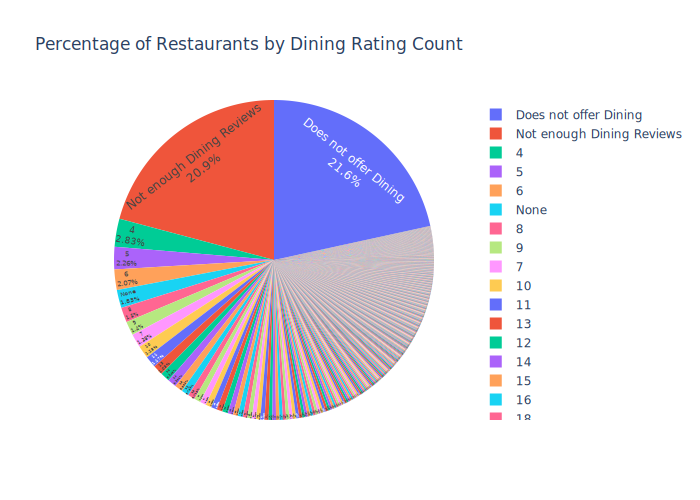

In [44]:
fig = px.pie(rating_type_df, names='Dining Rating Count', values='COUNT OF RESTAURANTS', color='Dining Rating Count',
 title='Percentage of Restaurants by Dining Rating Count').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [45]:
seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating Count',ascending=False).head(10)

Name of Restaurant       Location  \
10226  Aazhi - The Sea Food Mess     Karapakkam   
8144      New Papillon Le Bistro  Mahabalipuram   
6511       SS Star Ambur Briyani     Anna Nagar   
6089    New Nellai Pandian Hotel     Poonamalle   
6070               Hotel Semmien    Thiruvallur   
5996              Maapillai Mess      Ramapuram   
5928             Hotel Waves Inn    Kelambakkam   
5647    Al Taj Family Restaurant       Vandalur   
5632               The Food Club      Muttukadu   
5577             Mass Restaurant      Koyambedu   

                                                 Cuisine Top Dishes  \
10226         ['South Indian', ' Chettinad', ' Seafood']    Invalid   
8144   ['Continental', ' Chinese', ' North Indian', '...    Invalid   
6511   ['Biryani', ' Chinese', ' Chettinad', ' Seafoo...    Invalid   
6089   ['Chettinad', ' Chinese', ' Fast Food', ' Seaf...    Invalid   
6070            ['South Indian', ' Chinese', ' Seafood']    Invalid   
5996            ['North Indian', ' Chinese', ' Seafood']    Invalid   
5928   ['South Indian', ' North Indian', ' Chinese', ...    Invalid   
5647   ['Biryani', ' Chinese', ' North Indian', ' Sea...    Invalid   
5632   ['North Indian', ' Chinese', ' Seafood', ' Bir...    Invalid   
5577            ['North Indian', ' Chinese', ' Seafood']    Invalid   

       Price for 2 Dining Rating        Dining Rating Count  \
10226        800.0          None  Not enough Dining Reviews   
8144         700.0          None  Not enough Dining Reviews   
6511         650.0          None  Not enough Dining Reviews   
6089         800.0          None  Not enough Dining Reviews   
6070         500.0          None  Not enough Dining Reviews   
5996         250.0          None  Not enough Dining Reviews   
5928         500.0          None  Not enough Dining Reviews   
5647         350.0          None  Not enough Dining Reviews   
5632         500.0          None  Not enough Dining Reviews   
5577         450.0          None  Not enough Dining Reviews   

             Delivery Rating Count  \
10226  Not enough Delivery Reviews   
8144       Does not offer Delivery   
6511   Not enough Delivery Reviews   
6089   Not enough Delivery Reviews   
6070   Not enough Delivery Reviews   
5996                            66   
5928   Not enough Delivery Reviews   
5647   Not enough Delivery Reviews   
5632   Not enough Delivery Reviews   
5577   Not enough Delivery Reviews   

                                                Features  \
10226                ['Home Delivery', 'Indoor Seating']   
8144   ['Breakfast', 'Table Reservation Not Required'...   
6511                 ['Home Delivery', 'Indoor Seating']   
6089   ['Breakfast', 'Home Delivery', 'Free Parking',...   
6070                 ['Home Delivery', 'Indoor Seating']   
5996                 ['Home Delivery', 'Indoor Seating']   
5928   ['Home Delivery', 'Indoor Seating', 'Smoking A...   
5647    ['Breakfast', 'Home Delivery', 'Indoor Seating']   
5632   ['Home Delivery', 'Indoor Seating', 'Table boo...   
5577                 ['Home Delivery', 'Indoor Seating']   

                                           Home Delivery  \
10226                ['Home Delivery', 'Indoor Seating']   
8144   ['Breakfast', 'Table Reservation Not Required'...   
6511                 ['Home Delivery', 'Indoor Seating']   
6089   ['Breakfast', 'Home Delivery', 'Free Parking',...   
6070                 ['Home Delivery', 'Indoor Seating']   
5996                 ['Home Delivery', 'Indoor Seating']   
5928   ['Home Delivery', 'Indoor Seating', 'Smoking A...   
5647    ['Breakfast', 'Home Delivery', 'Indoor Seating']   
5632   ['Home Delivery', 'Indoor Seating', 'Table boo...   
5577                 ['Home Delivery', 'Indoor Seating']   

                                           Delivery Only  
10226                ['Home Delivery', 'Indoor Seating']  
8144   ['Breakfast', 'Table Reservation Not Required'...  
6511                 ['Home Delivery', 'Indoor Seating']  

In [46]:
foodtruck_df = zomato_df[zomato_df['Cuisine'] == 'Food Truck']
foodtruck_df.sort_values(by='Dining Rating Count',ascending=False).head(2)


Empty DataFrame
Columns: [Name of Restaurant, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating Count, Features, Home Delivery, Delivery Only]
Index: []

In [47]:
highest_rated_df = zomato_df[zomato_df['Price for 2'] >= 4700]
highest_rated_df

Name of Restaurant                         Location  \
803  Salt. Co. 531 - Radisson Blu GRT Hotel           Radisson Blu, GST Road   
826                  Blend - Taj Club House  Taj Club House, Thousand Lights   

                                               Cuisine  \
803  ['Continental', ' Asian', ' Mexican', ' Italian']   
826                                    ['Finger Food']   

                                            Top Dishes  Price for 2  \
803  ['Salmon', ' Mousse', ' Pasta', ' Chaat', ' Na...       4800.0   
826                             ['Cocktails', ' Beer']       5000.0   

    Dining Rating Dining Rating Count    Delivery Rating Count  \
803           4.0                 118  Does not offer Delivery   
826           4.1                 271  Does not offer Delivery   

                                              Features  \
803  ['Breakfast', 'Full Bar Available', 'Table boo...   
826  ['Wheelchair Accessible', 'Full Bar Available'...   

                                         Home Delivery  \
803  ['Breakfast', 'Full Bar Available', 'Table boo...   
826  ['Wheelchair Accessible', 'Full Bar Available'...   

                                         Delivery Only  
803  ['Breakfast', 'Full Bar Available', 'Table boo...  
826  ['Wheelchair Accessible', 'Full Bar Available'...

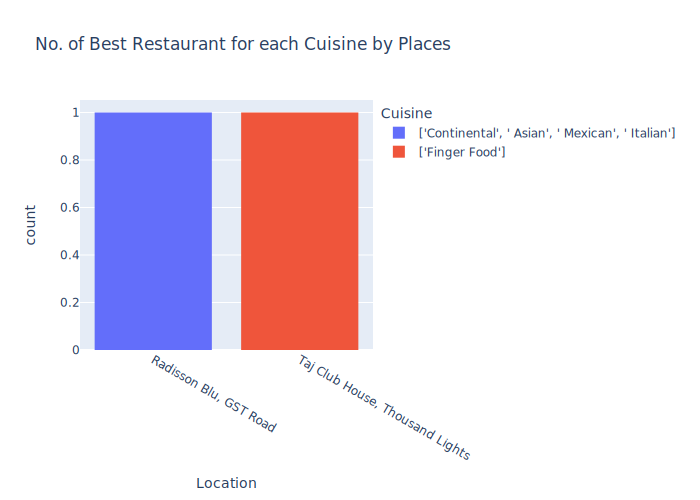

In [48]:
fig = px.histogram(
    highest_rated_df, 
    x='Location', 
    color='Cuisine',
    title='No. of Best Restaurant for each Cuisine by Places'
).update_xaxes(categoryorder="total descending")

fig.show()
                           

In [49]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()


Location  \
0           Radisson Blu, GST Road   
1  Taj Club House, Thousand Lights   

                                             Cuisine  Price for 2  
0  ['Continental', ' Asian', ' Mexican', ' Italian']       4800.0  
1                                    ['Finger Food']       5000.0

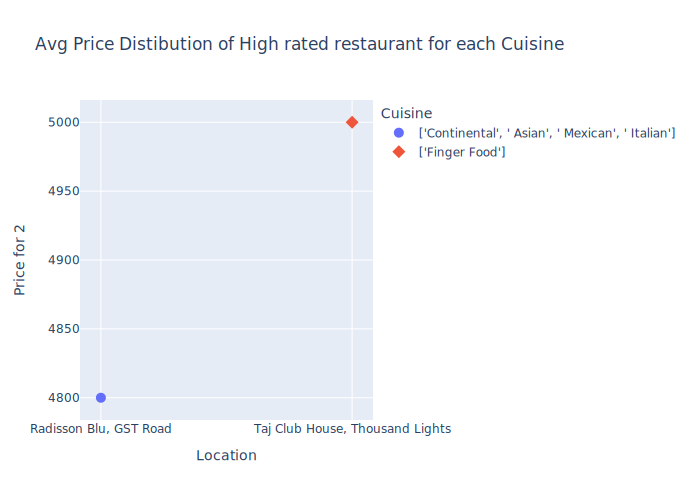

In [50]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine').update_traces(marker_size=10)
fig.show()


In [51]:
chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')]
chinese_df

Name of Restaurant     Location  \
2          SS Hyderabad Biryani  Kodambakkam   
4                 Tasty Kitchen     Perambur   
5                    Dine N Fun   Medavakkam   
8             Savoury Sea Shell   Anna Nagar   
9      Sangeetha Veg Restaurant     T. Nagar   
...                         ...          ...   
12014               Bowl Bazaar        Adyar   
12015               Bowl Bazaar   Medavakkam   
12016               Bowl Bazaar    Perungudi   
12017               Bowl Bazaar   Medavakkam   
12018               Bowl Bazaar  Ashok Nagar   

                                                 Cuisine  \
2      ['Biryani', ' North Indian', ' Chinese', ' Ara...   
4      ['Chinese', ' Biryani', ' North Indian', ' Che...   
5          ['South Indian', ' North Indian', ' Chinese']   
8      ['Arabian', ' Chinese', ' North Indian', ' Leb...   
9      ['South Indian', ' North Indian', ' Chinese', ...   
...                                                  ...   
12014  ['North Indian', ' South Indian', ' Chinese', ...   
12015  ['North Indian', ' South Indian', ' Chinese', ...   
12016      ['North Indian', ' South Indian', ' Chinese']   
12017      ['North Indian', ' South Indian', ' Chinese']   
12018      ['North Indian', ' South Indian', ' Chinese']   

                                              Top Dishes  Price for 2  \
2      ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
4      ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   
5      ['Chicken Grill', ' Shawarma', ' Naan', ' Chic...        450.0   
8      ['Shawarma', ' Chicken Grill', ' Brownie', ' S...       1400.0   
9      ['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...        800.0   
...                                                  ...          ...   
12014                                            Invalid        500.0   
12015                                            Invalid        500.0   
12016                                            Invalid        400.0   
12017                                            Invalid        400.0   
12018                                            Invalid        400.0   

      Dining Rating    Dining Rating Count        Delivery Rating Count  \
2               4.3                   1361                        10500   
4               4.2                    617                        22400   
5               4.1                    567                        24700   
8               4.2                   2564                        21700   
9               4.4                   1578                        39600   
...             ...                    ...                          ...   
12014          None  Does not offer Dining  Not enough Delivery Reviews   
12015          None  Does not offer Dining  Not enough Delivery Reviews   
12016          None  Does not offer Dining  Not enough Delivery Reviews   
12017          None  Does not offer Dining  Not enough Delivery Reviews   
12018          None  Does not offer Dining  Not enough Delivery Reviews   

                                                Features  \
2                    ['Home Delivery', 'Indoor Seating']   
4                    ['Home Delivery', 'Indoor Seating']   
5                    ['Home Delivery', 'Indoor Seating']   
8      ['Home Delivery', 'Indoor Seating', 'Card Upon...   
9      ['Breakfast', 'Home Delivery', 'Vegetarian Onl...   
...                                                  ...   
12014                                  ['Delivery Only']   
12015                                  ['Delivery Only']   
12016                                  ['Delivery Only']   
12017                                  ['Delivery Only']   
12018                                  ['Delivery Only']   

                                           Home Delivery  \
2                    ['Home Delivery', 'Indoor Seating']   
4                    ['Home Delivery', 'Indoor Seating']   
5                    ['Home Delivery

In [52]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant': 'count', 'Price for 2': 'mean'}).rename(columns={'NAME': 'Restaurant Count', 'PRICE': 'Average Price'})
chinese_rest_df = chinese_rest_df.sort_values('Name of Restaurant', ascending=False).head(25)
chinese_rest_df.head()


Name of Restaurant  Price for 2
Location                                   
Anna Nagar                 154   508.766234
Porur                      131   409.541985
Ambattur                   115   375.217391
Velachery                  102   488.235294
Perambur                    99   413.636364

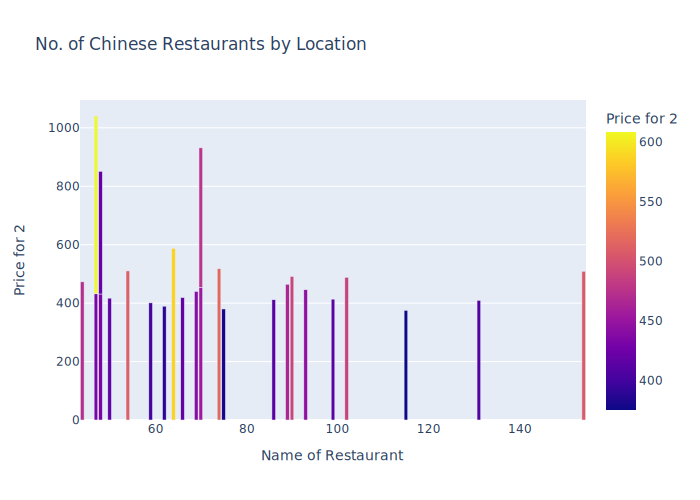

In [53]:
fig = px.bar(chinese_rest_df, x='Name of Restaurant', y='Price for 2', color='Price for 2', title='No. of Chinese Restaurants by Location ')
fig.show()

In [54]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating Count'])['Price for 2'].mean().reset_index()
price_rating_df

Cuisine  \
0     ['American', ' Andhra', ' Asian', ' Beverages'...   
1     ['American', ' Arabian', ' Italian', ' Mexican...   
2                                  ['American', ' BBQ']   
3     ['American', ' Continental', ' European', ' It...   
4     ['American', ' Continental', ' Italian', ' Nor...   
...                                                 ...   
6886                              ['Tibetan', ' Momos']   
6887                                        ['Tibetan']   
6888                              ['Turkish', ' Kebab']   
6889                            ['Wraps', ' Fast Food']   
6890                                          ['Wraps']   

            Dining Rating Count  Price for 2  
0                             8        800.0  
1                          None        150.0  
2     Not enough Dining Reviews        400.0  
3                           132        700.0  
4                           490        800.0  
...                         ...          ...  
6886  Not enough Dining Reviews        250.0  
6887  Not enough Dining Reviews        200.0  
6888                        375        500.0  
6889  Not enough Dining Reviews        300.0  
6890      Does not offer Dining        150.0  

[6891 rows x 3 columns]

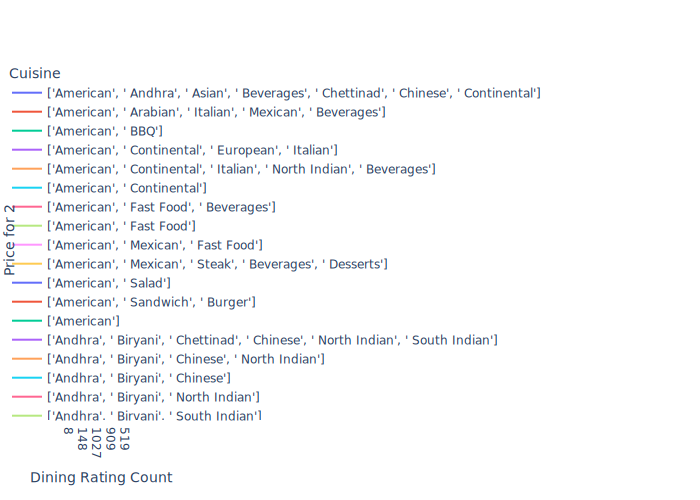

In [55]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating Count",color='Cuisine')
fig.show()

In [56]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

Location  Price for 2
0     InterContinental Chennai Mahabalipuram Resort...  1500.000000
1                                        Abhiramapuram   228.571429
2                          Abu Sarovar Portico, Egmore  1000.000000
3                                           Adambakkam   291.025641
4                                                Adyar   443.550000
..                                                 ...          ...
262                              Vivira Mall, Navallur   500.000000
263                                       Washermenpet   296.581197
264             WelcomHotel, RK Salai (Cathedral Road)  2075.000000
265                                      West Mambalam   267.846154
266                     Zone by The Park, Pallikaranai  1633.333333

[267 rows x 2 columns]

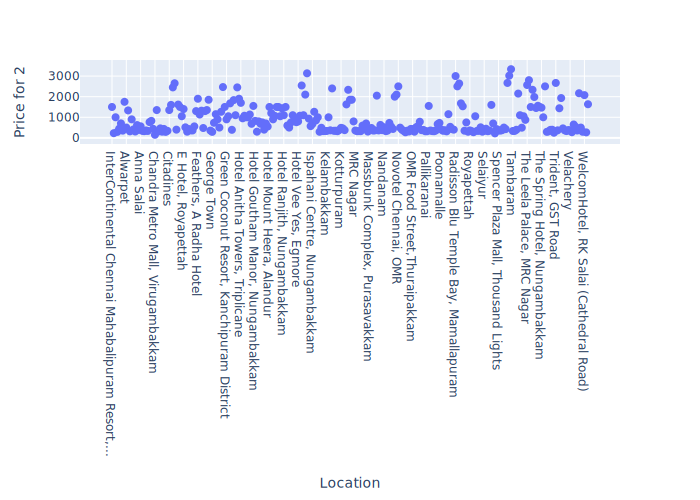

In [57]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()

In [58]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [67]:
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] >= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df

Name of Restaurant  Price for 2  \
530                         Robot Restaurant       1300.0   
3868                         Palm Beach Cafe       1300.0   
172                           Animal Kingdom       1300.0   
235                          Haven Sampoorna       1300.0   
1941                             Glasshopper       1300.0   
...                                      ...          ...   
647              China XO - The Leela Palace       4000.0   
443               Avartana - ITC Grand Chola       4500.0   
303               Peshawri - ITC Grand Chola       4500.0   
803   Salt. Co. 531 - Radisson Blu GRT Hotel       4800.0   
826                   Blend - Taj Club House       5000.0   

                                                Cuisine  \
530   ['Thai', ' Chinese', ' Asian', ' Momos', ' Sou...   
3868  ['Seafood', ' Chinese', ' North Indian', ' Con...   
172   ['North Indian', ' Chinese', ' Continental', '...   
235           ['North Indian', ' Chinese', ' European']   
1941         ['North Indian', ' Chinese', ' Fast Food']   
...                                                 ...   
647                                         ['Chinese']   
443           ['South Indian', ' Chinese', ' Desserts']   
303                        ['North Indian', ' Mughlai']   
803   ['Continental', ' Asian', ' Mexican', ' Italian']   
826                                     ['Finger Food']   

                                  Location  \
530                            Semmancheri   
3868  Ideal Beach Resort, Coast Road (ECR)   
172                                  Adyar   
235                              Velachery   
1941                             Perungudi   
...                                    ...   
647            The Leela Palace, MRC Nagar   
443                ITC Grand Chola, Guindy   
303                ITC Grand Chola, Guindy   
803                 Radisson Blu, GST Road   
826        Taj Club House, Thousand Lights   

                                                Cuisine  
530   ['Thai', ' Chinese', ' Asian', ' Momos', ' Sou...  
3868  ['Seafood', ' Chinese', ' North Indian', ' Con...  
172   ['North Indian', ' Chinese', ' Continental', '...  
235           ['North Indian', ' Chinese', ' European']  
1941         ['North Indian', ' Chinese', ' Fast Food']  
...                                                 ...  
647                                         ['Chinese']  
443           ['South Indian', ' Chinese', ' Desserts']  
303                        ['North Indian', ' Mughlai']  
803   ['Continental', ' Asian', ' Mexican', ' Italian']  
826                                     ['Finger Food']  

[292 rows x 5 columns]

In [68]:
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine','Dining Rating Count']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Price for 2'] >= 4500]
highrate_rest_df.sort_values(by='Price for 2', inplace=True)
highrate_rest_df


Name of Restaurant  Price for 2  \
303              Peshawri - ITC Grand Chola       4500.0   
443              Avartana - ITC Grand Chola       4500.0   
803  Salt. Co. 531 - Radisson Blu GRT Hotel       4800.0   
826                  Blend - Taj Club House       5000.0   

                                               Cuisine  \
303                       ['North Indian', ' Mughlai']   
443          ['South Indian', ' Chinese', ' Desserts']   
803  ['Continental', ' Asian', ' Mexican', ' Italian']   
826                                    ['Finger Food']   

                            Location  \
303          ITC Grand Chola, Guindy   
443          ITC Grand Chola, Guindy   
803           Radisson Blu, GST Road   
826  Taj Club House, Thousand Lights   

                                               Cuisine Dining Rating Count  
303                       ['North Indian', ' Mughlai']                 629  
443          ['South Indian', ' Chinese', ' Desserts']                 371  
803  ['Continental', ' Asian', ' Mexican', ' Italian']                 118  
826                                    ['Finger Food']                 271

In [69]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Cuisine_x']]
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
 'Location':'Location', 'Cuisine_x':'CUSINE'},inplace=True)


In [70]:
highrate_aff_df

Name of Restaurant  Price for 2  \
0              Avartana - ITC Grand Chola       4500.0   
1              Peshawri - ITC Grand Chola       4500.0   
2  Salt. Co. 531 - Radisson Blu GRT Hotel       4800.0   
3                  Blend - Taj Club House       5000.0   

                                              CUSINE  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                                              CUSINE  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                          Location  \
0          ITC Grand Chola, Guindy   
1          ITC Grand Chola, Guindy   
2           Radisson Blu, GST Road   
3  Taj Club House, Thousand Lights   

                                              CUSINE  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                                              CUSINE  
0          ['South Indian', ' Chinese', ' Desserts']  
1                       ['North Indian', ' Mughlai']  
2  ['Continental', ' Asian', ' Mexican', ' Italian']  
3                                    ['Finger Food']

In [71]:
mean_votes = zomato_df['Price for 2'].mean()
mean_votes

398.282019190655

In [72]:
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine', 'Dining Rating']]
mean_rest_df = mean_rest_df[mean_rest_df['Price for 2'] > 177]
mean_rest_df.sort_values(by='Price for 2', inplace=True)
mean_rest_df

Name of Restaurant  Price for 2  \
7028                  Wow Burgers And Shakes        180.0   
5807              Ovenfresh Pizza's & Cake's        200.0   
3018                      Hotel Selva Bhavan        200.0   
7856                   Konaseema Ruchulu @fs        200.0   
7855             Krafty Juice Shop And Chats        200.0   
...                                      ...          ...   
647              China XO - The Leela Palace       4000.0   
443               Avartana - ITC Grand Chola       4500.0   
303               Peshawri - ITC Grand Chola       4500.0   
803   Salt. Co. 531 - Radisson Blu GRT Hotel       4800.0   
826                   Blend - Taj Club House       5000.0   

                                                Cuisine  \
7028              ['Burger', ' Beverages', ' Sandwich']   
5807                            ['Pizza', ' Fast Food']   
3018                                   ['South Indian']   
7856                             ['Andhra', ' Biryani']   
7855                           ['Beverages', ' Juices']   
...                                                 ...   
647                                         ['Chinese']   
443           ['South Indian', ' Chinese', ' Desserts']   
303                        ['North Indian', ' Mughlai']   
803   ['Continental', ' Asian', ' Mexican', ' Italian']   
826                                     ['Finger Food']   

                             Location  \
7028                       Arumbakkam   
5807                       Medavakkam   
3018                         Kolathur   
7856                         Taramani   
7855                     Purasavakkam   
...                               ...   
647       The Leela Palace, MRC Nagar   
443           ITC Grand Chola, Guindy   
303           ITC Grand Chola, Guindy   
803            Radisson Blu, GST Road   
826   Taj Club House, Thousand Lights   

                                                Cuisine Dining Rating  
7028              ['Burger', ' Beverages', ' Sandwich']          None  
5807                            ['Pizza', ' Fast Food']          None  
3018                                   ['South Indian']           3.6  
7856                             ['Andhra', ' Biryani']          None  
7855                           ['Beverages', ' Juices']          None  
...                                                 ...           ...  
647                                         ['Chinese']           4.3  
443           ['South Indian', ' Chinese', ' Desserts']           4.8  
303                        ['North Indian', ' Mughlai']           4.6  
803   ['Continental', ' Asian', ' Mexican', ' Italian']           4.0  
826                                     ['Finger Food']           4.1  

[10735 rows x 6 columns]

In [73]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine', 'Location', 'Cuisine']]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine':'Cuisine',
 'Location':'Location', 'Cuisine':'Cuisine'},inplace=True)

In [74]:
reliable_rest_df

Name of Restaurant  Price for 2  \
0              Avartana - ITC Grand Chola       4500.0   
1              Peshawri - ITC Grand Chola       4500.0   
2  Salt. Co. 531 - Radisson Blu GRT Hotel       4800.0   
3                  Blend - Taj Club House       5000.0   

                                             Cuisine  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                                             Cuisine  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                          Location  \
0          ITC Grand Chola, Guindy   
1          ITC Grand Chola, Guindy   
2           Radisson Blu, GST Road   
3  Taj Club House, Thousand Lights   

                                             Cuisine  \
0          ['South Indian', ' Chinese', ' Desserts']   
1                       ['North Indian', ' Mughlai']   
2  ['Continental', ' Asian', ' Mexican', ' Italian']   
3                                    ['Finger Food']   

                                             Cuisine  
0          ['South Indian', ' Chinese', ' Desserts']  
1                       ['North Indian', ' Mughlai']  
2  ['Continental', ' Asian', ' Mexican', ' Italian']  
3                                    ['Finger Food']